Auto- TS

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from autots import AutoTS

# Load the dataset
data = pd.read_csv("D:\\stubble buring\\stubble\\STN1.csv")

# Convert the 'DATE' column to datetime format, specifying the format
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')

# Prepare the dataset for AutoTS
# Extract the month and year from the 'DATE' column
data['Month'] = data['DATE'].dt.to_period('M')

# Convert the 'Month' column to a datetime object (Timestamp)
data['Month'] = data['Month'].dt.to_timestamp()

# If you want to use 'FIRECOUNT' as the target variable:
data = data[['Month', 'FIRECOUNT']]  # Adjust to select the correct columns

# Initialize AutoTS model
model = AutoTS(
    forecast_length=12,  # Number of periods to forecast
    frequency='MS',  # Monthly data
    ensemble='simple',  # Ensemble method
    model_list="default",  # Can be set to "fast", "superfast", "default", or "all"
    max_generations=5,  # Number of generations for genetic model selection
    n_jobs='auto'  # Use all available CPUs for processing
)

# Fit the model on the dataset (using reset_index to make Month a column)
model = model.fit(data.reset_index(drop=True), date_col='Month', value_col='FIRECOUNT', id_col=None)

# Predict future values
prediction = model.predict()
forecast = prediction.forecast  # Extracting the forecasted values

# Print the best model used and forecast results
print("Best Model:", model.best_model['Model'])
print("Forecasted Values:\n", forecast)

# Display the forecast for 2022, 2023, 2024, and 2025
for year in [2022, 2023, 2024, 2025]:
    year_forecast = forecast.loc[forecast.index.year == year, 'FIRECOUNT']
    print(f"The predicted value for {year} is:")
    print(year_forecast)

# Plot actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['FIRECOUNT'], label="Actual Data")
plt.plot(forecast.index, forecast['FIRECOUNT'], label="Forecast", linestyle="--")
plt.title("Fire Count Forecast using AutoTS")
plt.xlabel("Date")
plt.ylabel("Fire Count")
plt.legend()
plt.show()


DARTS

In [12]:
!pip install darts pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\1024037040.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values
C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\1024037040.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').sum()  # Resample by summing over months


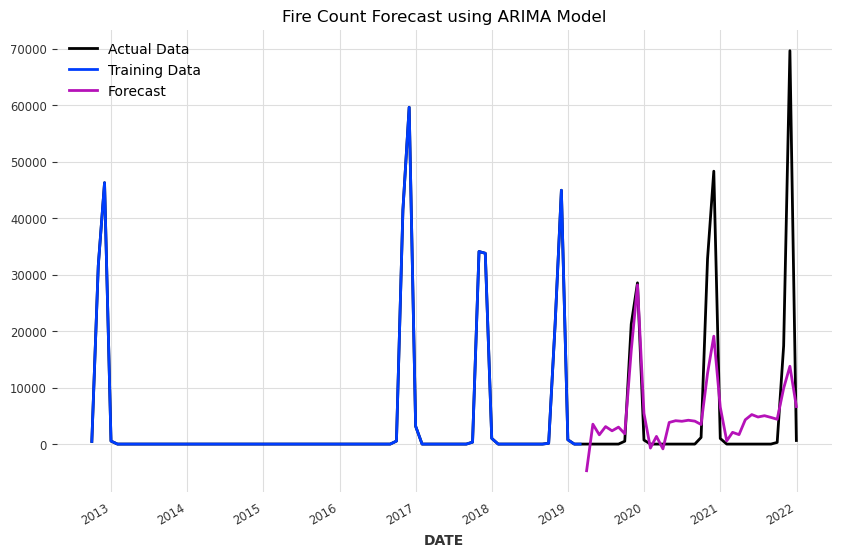

Mean Absolute Error: 6233.827553424462
The predicted value for 2022 is 61557.63
The predicted value for 2023 is 63735.96
The predicted value for 2024 is 65165.83
The predicted value for 2025 is 65985.90


C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\1024037040.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')


In [19]:
#!pip install darts pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ARIMA
from darts.metrics import mae

# Load the dataset
data = pd.read_csv('STN1.csv')

# Convert the DATE column to datetime format with dayfirst=True
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)
data.set_index('DATE', inplace=True)

# Handle missing values - Fill missing data (you can use forward fill, interpolation, or other methods)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Resample data to monthly frequency (assuming you have daily data)
data_monthly = data.resample('M').sum()  # Resample by summing over months

# Create a TimeSeries object for the 'FIRECOUNT' column
series = TimeSeries.from_series(data_monthly['FIRECOUNT'])

# Split the dataset into train and test sets (70:30 ratio)
train_size = int(0.7 * len(series))
train, test = series[:train_size], series[train_size:]

# Choose the model (ARIMA model)
model = ARIMA()

# Fit the model on the training data
model.fit(train)

# Forecast for the test period
forecast = model.predict(len(test))

# Visualize the results
plt.figure(figsize=(10, 6))
series.plot(label="Actual Data")
train.plot(label="Training Data")
forecast.plot(label="Forecast")
plt.title("Fire Count Forecast using ARIMA Model")
plt.legend()
plt.show()

# Calculate Mean Absolute Error on the test set
error = mae(test, forecast)
print(f"Mean Absolute Error: {error}")

# Forecast for the next 4 years (2022-2025)
future_forecast = model.predict(48)

# Generate a date range for the forecast (assuming monthly frequency)
forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')

# Create a DataFrame for the forecast values with the correct date index
forecast_values = pd.DataFrame(future_forecast.pd_dataframe()['FIRECOUNT'].values, index=forecast_dates, columns=['FIRECOUNT'])

# Display predictions for each year (2022-2025)
for year in range(2022, 2026):
    # Get the forecast values for the current year
    year_forecast = forecast_values[forecast_values.index.year == year]
    
    # Display the predicted values for each year
    predicted_value = year_forecast['FIRECOUNT'].sum()  # You can choose sum, mean, or any other aggregation method
    print(f"The predicted value for {year} is {predicted_value:.2f}")


C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\2835940591.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values
C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\2835940591.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').sum()  # Resample by summing over months
e:\Anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


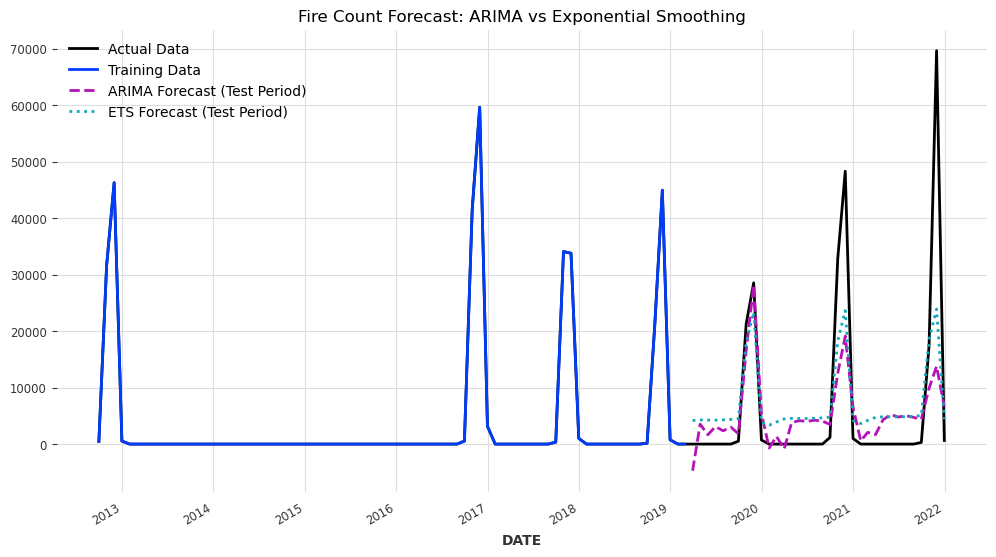

Mean Absolute Error (ARIMA): 6233.83
Root Mean Square Error (ARIMA): 11945.97
Mean Absolute Error (Exponential Smoothing): 6293.21
Root Mean Square Error (Exponential Smoothing): 10102.50

ARIMA Predictions:
The predicted value for 2022 (ARIMA) is 61557.63
The predicted value for 2023 (ARIMA) is 63735.96
The predicted value for 2024 (ARIMA) is 65165.83
The predicted value for 2025 (ARIMA) is 65985.90

Exponential Smoothing Predictions:
The predicted value for 2022 (ETS) is 82530.02
The predicted value for 2023 (ETS) is 85898.21
The predicted value for 2024 (ETS) is 89266.39
The predicted value for 2025 (ETS) is 92634.58


C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\2835940591.py:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')


In [22]:
#!pip install darts pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ARIMA, ExponentialSmoothing
from darts.metrics import mae, rmse

# Load the dataset
data = pd.read_csv('STN1.csv')

# Convert the DATE column to datetime format with dayfirst=True
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)
data.set_index('DATE', inplace=True)

# Handle missing values - Fill missing data (you can use forward fill, interpolation, or other methods)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Resample data to monthly frequency (assuming you have daily data)
data_monthly = data.resample('M').sum()  # Resample by summing over months

# Create a TimeSeries object for the 'FIRECOUNT' column
series = TimeSeries.from_series(data_monthly['FIRECOUNT'])

# Split the dataset into train and test sets (70:30 ratio)
train_size = int(0.7 * len(series))
train, test = series[:train_size], series[train_size:]

# --- ARIMA Model ---
# Initialize and fit ARIMA model
arima_model = ARIMA()
arima_model.fit(train)

# Forecast for the test period using ARIMA
arima_forecast = arima_model.predict(len(test))

# Forecast for the next 4 years using ARIMA
arima_future_forecast = arima_model.predict(48)

# --- Exponential Smoothing Model ---
# Initialize and fit Exponential Smoothing model
ets_model = ExponentialSmoothing()
ets_model.fit(train)

# Forecast for the test period using ETS
ets_forecast = ets_model.predict(len(test))

# Forecast for the next 4 years using ETS
ets_future_forecast = ets_model.predict(48)

# --- Visualization ---
plt.figure(figsize=(12, 6))
series.plot(label="Actual Data", linewidth=2)
train.plot(label="Training Data", linewidth=2)
arima_forecast.plot(label="ARIMA Forecast (Test Period)", linestyle='--')
ets_forecast.plot(label="ETS Forecast (Test Period)", linestyle=':')
plt.title("Fire Count Forecast: ARIMA vs Exponential Smoothing")
plt.legend()
plt.show()

# --- Error Calculation ---
arima_mae = mae(test, arima_forecast)
ets_mae = mae(test, ets_forecast)

arima_rmse = rmse(test, arima_forecast)
ets_rmse = rmse(test, ets_forecast)

print(f"Mean Absolute Error (ARIMA): {arima_mae:.2f}")
print(f"Root Mean Square Error (ARIMA): {arima_rmse:.2f}")

print(f"Mean Absolute Error (Exponential Smoothing): {ets_mae:.2f}")
print(f"Root Mean Square Error (Exponential Smoothing): {ets_rmse:.2f}")

# --- Display Yearly Predictions ---
# Generate a date range for the forecast (assuming monthly frequency)
forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')

# ARIMA Predictions
arima_forecast_values = pd.DataFrame(
    arima_future_forecast.pd_dataframe()['FIRECOUNT'].values,
    index=forecast_dates,
    columns=['FIRECOUNT']
)

# ETS Predictions
ets_forecast_values = pd.DataFrame(
    ets_future_forecast.pd_dataframe()['FIRECOUNT'].values,
    index=forecast_dates,
    columns=['FIRECOUNT']
)

print("\nARIMA Predictions:")
for year in range(2022, 2026):
    year_forecast = arima_forecast_values[arima_forecast_values.index.year == year]
    predicted_value = year_forecast['FIRECOUNT'].sum()
    print(f"The predicted value for {year} (ARIMA) is {predicted_value:.2f}")

print("\nExponential Smoothing Predictions:")
for year in range(2022, 2026):
    year_forecast = ets_forecast_values[ets_forecast_values.index.year == year]
    predicted_value = year_forecast['FIRECOUNT'].sum()
    print(f"The predicted value for {year} (ETS) is {predicted_value:.2f}")


C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\3679722665.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values
C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\3679722665.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').sum()  # Resample by summing over months


Fitting and forecasting with ARIMA...
ARIMA -> MAE: 6233.83, RMSE: 11945.97
Fitting and forecasting with Exponential Smoothing...
Exponential Smoothing -> MAE: 6293.21, RMSE: 10102.50
Fitting and forecasting with AutoARIMA...


e:\Anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


AutoARIMA -> MAE: 6756.76, RMSE: 17059.35
Fitting and forecasting with Prophet...
Prophet -> MAE: 5869.81, RMSE: 8581.40
Fitting and forecasting with NBEATS...


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

NBEATS -> MAE: 3214.83, RMSE: 8269.51


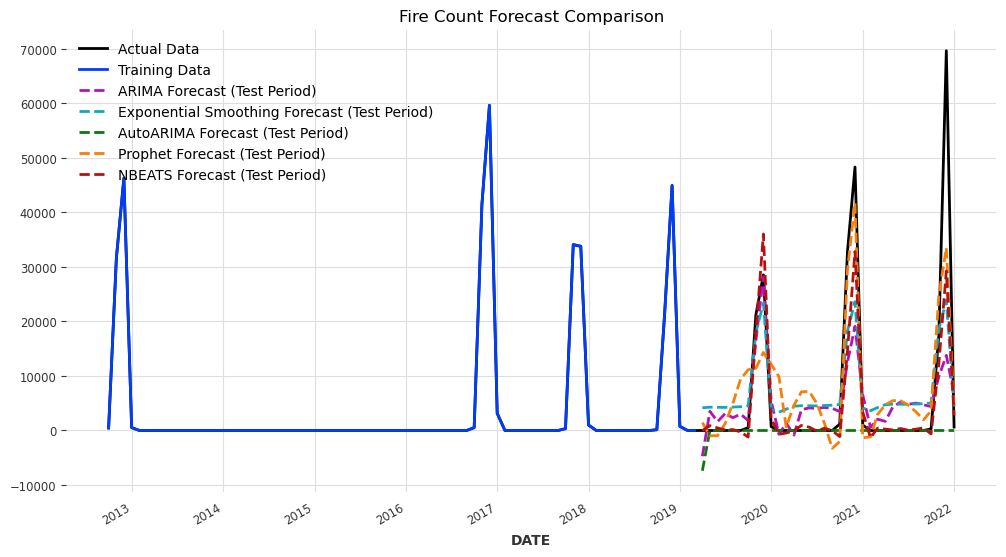


Yearly Predictions for 2022–2025:

ARIMA Predictions:
The predicted value for 2022 (ARIMA) is 61557.63
The predicted value for 2023 (ARIMA) is 63735.96
The predicted value for 2024 (ARIMA) is 65165.83
The predicted value for 2025 (ARIMA) is 65985.90

Exponential Smoothing Predictions:
The predicted value for 2022 (Exponential Smoothing) is 82530.02
The predicted value for 2023 (Exponential Smoothing) is 85898.21
The predicted value for 2024 (Exponential Smoothing) is 89266.39
The predicted value for 2025 (Exponential Smoothing) is 92634.58

AutoARIMA Predictions:
The predicted value for 2022 (AutoARIMA) is -7376.71
The predicted value for 2023 (AutoARIMA) is 0.00
The predicted value for 2024 (AutoARIMA) is 0.00
The predicted value for 2025 (AutoARIMA) is 0.00

Prophet Predictions:
The predicted value for 2022 (Prophet) is 74834.89
The predicted value for 2023 (Prophet) is 91623.26
The predicted value for 2024 (Prophet) is 100138.93
The predicted value for 2025 (Prophet) is 108696.33



C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\3679722665.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')


In [23]:
#!pip install darts pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ARIMA, ExponentialSmoothing, AutoARIMA, Prophet, NBEATSModel
from darts.metrics import mae, rmse

# Load the dataset
data = pd.read_csv('STN1.csv')

# Convert the DATE column to datetime format with dayfirst=True
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)
data.set_index('DATE', inplace=True)

# Handle missing values - Fill missing data (you can use forward fill, interpolation, or other methods)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Resample data to monthly frequency (assuming you have daily data)
data_monthly = data.resample('M').sum()  # Resample by summing over months

# Create a TimeSeries object for the 'FIRECOUNT' column
series = TimeSeries.from_series(data_monthly['FIRECOUNT'])

# Split the dataset into train and test sets (70:30 ratio)
train_size = int(0.7 * len(series))
train, test = series[:train_size], series[train_size:]

# --- Initialize Models ---
models = {
    "ARIMA": ARIMA(),
    "Exponential Smoothing": ExponentialSmoothing(),
    "AutoARIMA": AutoARIMA(),
    "Prophet": Prophet(),
    "NBEATS": NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=42),
}

results = {}

# --- Fit and Forecast with Each Model ---
for name, model in models.items():
    print(f"Fitting and forecasting with {name}...")
    
    # Fit the model
    model.fit(train)
    
    # Forecast for the test period
    test_forecast = model.predict(len(test))
    
    # Forecast for the next 4 years (48 months)
    future_forecast = model.predict(48)
    
    # Calculate errors
    test_mae = mae(test, test_forecast)
    test_rmse = rmse(test, test_forecast)
    
    # Store results
    results[name] = {
        "test_mae": test_mae,
        "test_rmse": test_rmse,
        "test_forecast": test_forecast,
        "future_forecast": future_forecast,
    }
    print(f"{name} -> MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}")

# --- Visualization ---
plt.figure(figsize=(12, 6))
series.plot(label="Actual Data", linewidth=2)
train.plot(label="Training Data", linewidth=2)

for name, result in results.items():
    result["test_forecast"].plot(label=f"{name} Forecast (Test Period)", linestyle='--')

plt.title("Fire Count Forecast Comparison")
plt.legend()
plt.show()

# --- Display Yearly Predictions ---
# Generate a date range for the forecast (assuming monthly frequency)
forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')

print("\nYearly Predictions for 2022–2025:")
for name, result in results.items():
    print(f"\n{name} Predictions:")
    future_forecast_values = pd.DataFrame(
        result["future_forecast"].pd_dataframe()['FIRECOUNT'].values,
        index=forecast_dates,
        columns=['FIRECOUNT']
    )
    
    for year in range(2022, 2026):
        year_forecast = future_forecast_values[future_forecast_values.index.year == year]
        predicted_value = year_forecast['FIRECOUNT'].sum()
        print(f"The predicted value for {year} ({name}) is {predicted_value:.2f}")


C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\2450011907.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values
C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\2450011907.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').sum()  # Resample by summing over months
e:\Anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



--- ARIMA Model ---
Mean Absolute Error (MAE): 6233.83
Root Mean Square Error (RMSE): 11945.97

--- Exponential Smoothing Model ---
Mean Absolute Error (MAE): 6293.21
Root Mean Square Error (RMSE): 10102.50

--- AutoARIMA Model ---
Mean Absolute Error (MAE): 6756.76
Root Mean Square Error (RMSE): 17059.35

--- Prophet Model ---


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Mean Absolute Error (MAE): 5869.81
Root Mean Square Error (RMSE): 8581.40

--- NBEATS Model ---


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Mean Absolute Error (MAE): 3069.81
Root Mean Square Error (RMSE): 8008.92


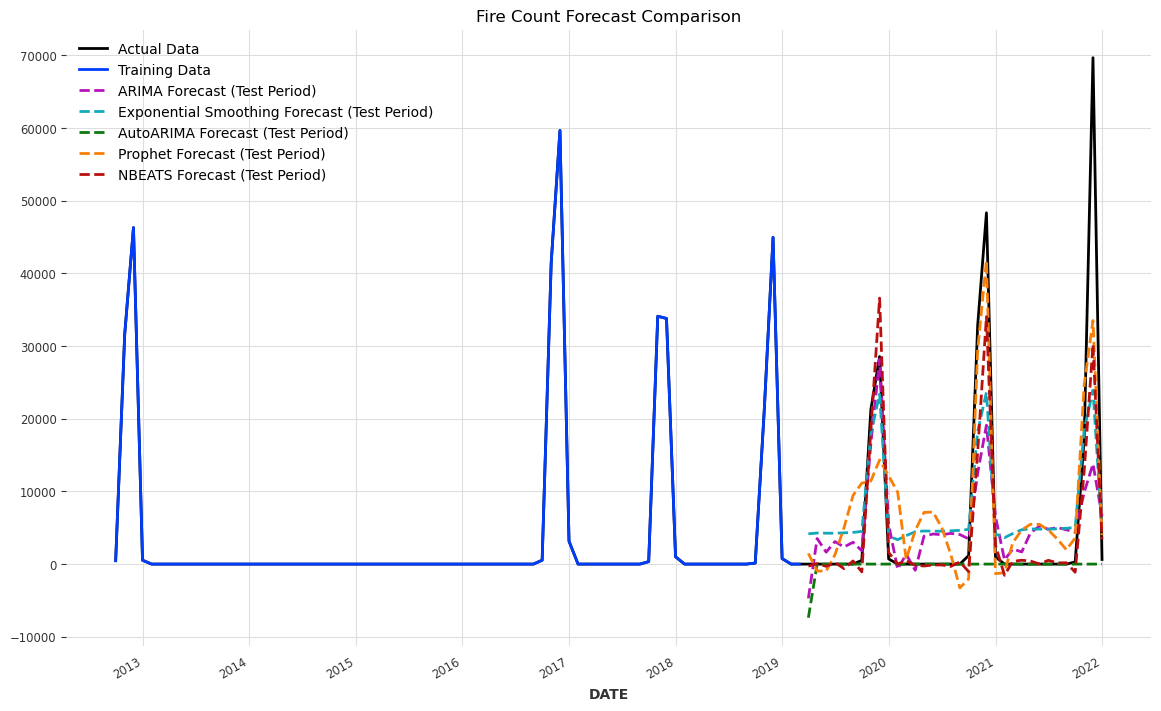


--- ARIMA Yearly Predictions ---
The predicted value for 2022 (ARIMA) is 61557.63
The predicted value for 2023 (ARIMA) is 63735.96
The predicted value for 2024 (ARIMA) is 65165.83
The predicted value for 2025 (ARIMA) is 65985.90

--- Exponential Smoothing Yearly Predictions ---
The predicted value for 2022 (Exponential Smoothing) is 82530.02
The predicted value for 2023 (Exponential Smoothing) is 85898.21
The predicted value for 2024 (Exponential Smoothing) is 89266.39
The predicted value for 2025 (Exponential Smoothing) is 92634.58

--- AutoARIMA Yearly Predictions ---
The predicted value for 2022 (AutoARIMA) is -7376.71
The predicted value for 2023 (AutoARIMA) is 0.00
The predicted value for 2024 (AutoARIMA) is 0.00
The predicted value for 2025 (AutoARIMA) is 0.00

--- Prophet Yearly Predictions ---
The predicted value for 2022 (Prophet) is 74834.89
The predicted value for 2023 (Prophet) is 91623.26
The predicted value for 2024 (Prophet) is 100138.93
The predicted value for 2025 (Pr

C:\Users\goelk\AppData\Local\Temp\ipykernel_36068\2450011907.py:81: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')


In [24]:
#!pip install darts pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ARIMA, ExponentialSmoothing, AutoARIMA, Prophet, NBEATSModel
from darts.metrics import mae, rmse

# Load the dataset
data = pd.read_csv('STN1.csv')

# Convert the DATE column to datetime format with dayfirst=True
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)
data.set_index('DATE', inplace=True)

# Handle missing values - Fill missing data (you can use forward fill, interpolation, or other methods)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Resample data to monthly frequency (assuming you have daily data)
data_monthly = data.resample('M').sum()  # Resample by summing over months

# Create a TimeSeries object for the 'FIRECOUNT' column
series = TimeSeries.from_series(data_monthly['FIRECOUNT'])

# Split the dataset into train and test sets (70:30 ratio)
train_size = int(0.7 * len(series))
train, test = series[:train_size], series[train_size:]

# --- Models Setup ---
models = {
    "ARIMA": ARIMA(),
    "Exponential Smoothing": ExponentialSmoothing(),
    "AutoARIMA": AutoARIMA(),
    "Prophet": Prophet(),
    "NBEATS": NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50),
}

# --- Model Evaluation ---
results = {}

for model_name, model in models.items():
    print(f"\n--- {model_name} Model ---")
    model.fit(train)
    
    # Forecast for the test period
    test_forecast = model.predict(len(test))
    
    # Calculate MAE and RMSE
    test_mae = mae(test, test_forecast)
    test_rmse = rmse(test, test_forecast)
    
    # Forecast for the next 4 years (48 months)
    future_forecast = model.predict(48)
    
    # Save results
    results[model_name] = {
        "test_forecast": test_forecast,
        "future_forecast": future_forecast,
        "test_mae": test_mae,
        "test_rmse": test_rmse,
    }
    
    # Print errors
    print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
    print(f"Root Mean Square Error (RMSE): {test_rmse:.2f}")

# --- Visualization ---
plt.figure(figsize=(14, 8))
series.plot(label="Actual Data", linewidth=2)
train.plot(label="Training Data", linewidth=2)

for model_name, result in results.items():
    result["test_forecast"].plot(label=f"{model_name} Forecast (Test Period)", linestyle="--")

plt.title("Fire Count Forecast Comparison")
plt.legend()
plt.show()

# --- Yearly Predictions ---
# Generate a date range for the forecast (assuming monthly frequency)
forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')

for model_name, result in results.items():
    print(f"\n--- {model_name} Yearly Predictions ---")
    
    # Convert the future forecast into a DataFrame with correct date index
    future_forecast_values = pd.DataFrame(
        result["future_forecast"].pd_dataframe()['FIRECOUNT'].values,
        index=forecast_dates,
        columns=['FIRECOUNT']
    )
    
    # Display yearly predictions
    for year in range(2022, 2026):
        year_forecast = future_forecast_values[future_forecast_values.index.year == year]
        predicted_value = year_forecast['FIRECOUNT'].sum()  # Aggregate yearly values
        print(f"The predicted value for {year} ({model_name}) is {predicted_value:.2f}")


C:\Users\goelk\AppData\Local\Temp\ipykernel_21340\621769344.py:20: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\goelk\AppData\Local\Temp\ipykernel_21340\621769344.py:23: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.


Fitting and forecasting with ARIMA...
ARIMA -> MAE: 6233.83, RMSE: 11945.97
Fitting and forecasting with Exponential Smoothing...
Exponential Smoothing -> MAE: 6293.21, RMSE: 10102.50
Fitting and forecasting with AutoARIMA...


e:\Anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

21:33:05 - cmdstanpy - INFO - Chain [1] start processing


AutoARIMA -> MAE: 6756.76, RMSE: 17059.35
Fitting and forecasting with Prophet...


21:33:05 - cmdstanpy - INFO - Chain [1] done processing


Prophet -> MAE: 5869.81, RMSE: 8581.40
Fitting and forecasting with NBEATS...


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 700    | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


NBEATS -> MAE: 3214.83, RMSE: 8269.51
Fitting and forecasting with Linear Regression...
Linear Regression -> MAE: 6096.76, RMSE: 13454.17
Fitting and forecasting with RNN...


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

RNN -> MAE: 6540.63, RMSE: 17011.27


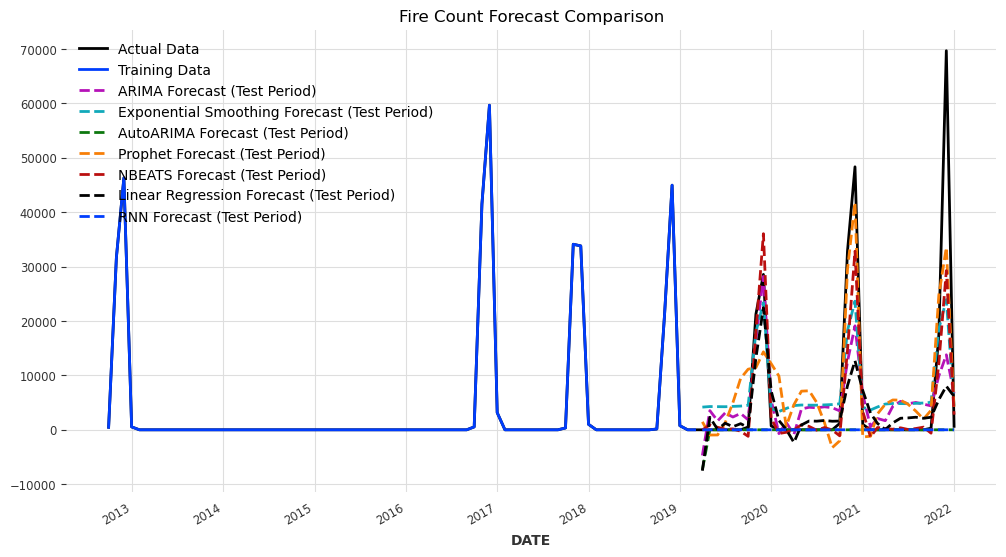


Yearly Predictions for 2022–2025 (Using Mean Value):

ARIMA Predictions (Mean Value):
The predicted mean value for 2022–2025 (ARIMA) is 5342.61

Exponential Smoothing Predictions (Mean Value):
The predicted mean value for 2022–2025 (Exponential Smoothing) is 7298.52

AutoARIMA Predictions (Mean Value):
The predicted mean value for 2022–2025 (AutoARIMA) is -153.68

Prophet Predictions (Mean Value):
The predicted mean value for 2022–2025 (Prophet) is 7818.61

NBEATS Predictions (Mean Value):
The predicted mean value for 2022–2025 (NBEATS) is 3864.57

Linear Regression Predictions (Mean Value):
The predicted mean value for 2022–2025 (Linear Regression) is 3270.83

RNN Predictions (Mean Value):
The predicted mean value for 2022–2025 (RNN) is 2.88


C:\Users\goelk\AppData\Local\Temp\ipykernel_21340\621769344.py:85: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [16]:
#!pip install darts pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import (
    ARIMA, ExponentialSmoothing, AutoARIMA, Prophet, NBEATSModel,
    LinearRegressionModel, RNNModel
)
from darts.metrics import mae, rmse

# Load the dataset
data = pd.read_csv('STN1.csv')

# Convert the DATE column to datetime format with dayfirst=True
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)
data.set_index('DATE', inplace=True)

# Handle missing values - Fill missing data (you can use forward fill, interpolation, or other methods)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Resample data to monthly frequency (assuming you have daily data)
data_monthly = data.resample('M').sum()  # Resample by summing over months

# Create a TimeSeries object for the 'FIRECOUNT' column
series = TimeSeries.from_series(data_monthly['FIRECOUNT'])

# Split the dataset into train and test sets (70:30 ratio)
train_size = int(0.7 * len(series))
train, test = series[:train_size], series[train_size:]

# --- Initialize Models ---
models = {
    "ARIMA": ARIMA(),
    "Exponential Smoothing": ExponentialSmoothing(),
    "AutoARIMA": AutoARIMA(),
    "Prophet": Prophet(),
    "NBEATS": NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=42),
    "Linear Regression": LinearRegressionModel(lags=12),
    "RNN": RNNModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=42),
}

results = {}

# --- Fit and Forecast with Each Model ---
for name, model in models.items():
    print(f"Fitting and forecasting with {name}...")
    
    # Fit the model
    model.fit(train)
    
    # Forecast for the test period
    test_forecast = model.predict(len(test))
    
    # Forecast for the next 4 years (48 months)
    future_forecast = model.predict(48)
    
    # Calculate errors
    test_mae = mae(test, test_forecast)
    test_rmse = rmse(test, test_forecast)
    
    # Store results
    results[name] = {
        "test_mae": test_mae,
        "test_rmse": test_rmse,
        "test_forecast": test_forecast,
        "future_forecast": future_forecast,
    }
    print(f"{name} -> MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}")

# --- Visualization ---
plt.figure(figsize=(12, 6))
series.plot(label="Actual Data", linewidth=2)
train.plot(label="Training Data", linewidth=2)

for name, result in results.items():
    result["test_forecast"].plot(label=f"{name} Forecast (Test Period)", linestyle='--')

plt.title("Fire Count Forecast Comparison")
plt.legend()
plt.show()

# --- Display Yearly Predictions using Mean Value ---
# Generate a date range for the forecast (assuming monthly frequency)
forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')

print("\nYearly Predictions for 2022–2025 (Using Mean Value):")
for name, result in results.items():
    print(f"\n{name} Predictions (Mean Value):")
    future_forecast_values = pd.DataFrame(
        result["future_forecast"].pd_dataframe()['FIRECOUNT'].values,
        index=forecast_dates,
        columns=['FIRECOUNT']
    )
    
    # Calculate the mean value for the forecasted period (2022-2025)
    mean_value = future_forecast_values['FIRECOUNT'].mean()
    
    # Display predicted value using the mean
    print(f"The predicted mean value for 2022–2025 ({name}) is {mean_value:.2f}")


C:\Users\goelk\AppData\Local\Temp\ipykernel_21340\74387015.py:20: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\goelk\AppData\Local\Temp\ipykernel_21340\74387015.py:23: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
e:\Anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Fitting and forecasting with ARIMA...
ARIMA -> MAE: 6233.83, RMSE: 11945.97
Fitting and forecasting with Exponential Smoothing...
Exponential Smoothing -> MAE: 6293.21, RMSE: 10102.50
Fitting and forecasting with AutoARIMA...


21:34:09 - cmdstanpy - INFO - Chain [1] start processing


AutoARIMA -> MAE: 6756.76, RMSE: 17059.35
Fitting and forecasting with Prophet...


21:34:09 - cmdstanpy - INFO - Chain [1] done processing
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Prophet -> MAE: 5869.81, RMSE: 8581.40
Fitting and forecasting with NBEATS...


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 700    | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


NBEATS -> MAE: 3214.83, RMSE: 8269.51
Fitting and forecasting with Linear Regression...
Linear Regression -> MAE: 6096.76, RMSE: 13454.17
Fitting and forecasting with RNN...


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

RNN -> MAE: 6540.63, RMSE: 17011.27


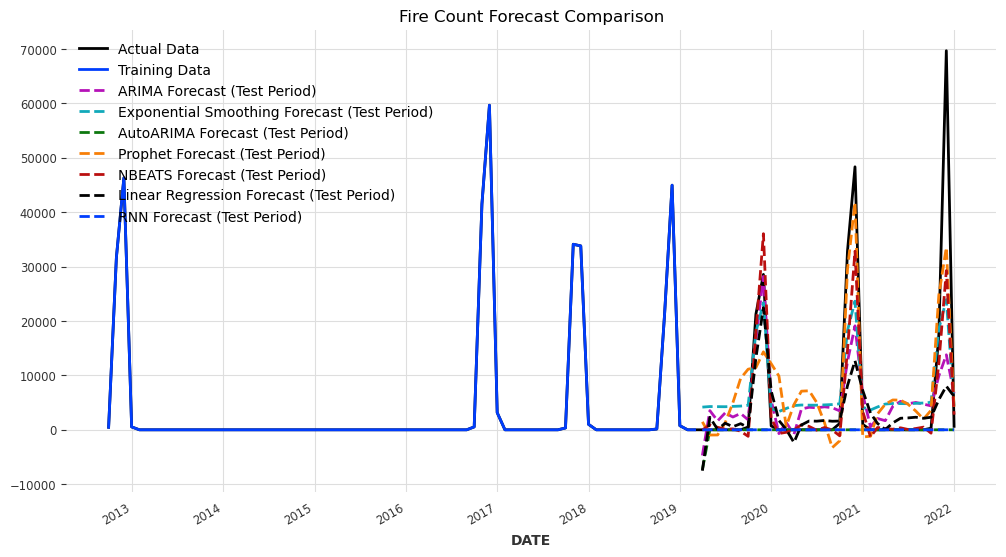


Yearly Predictions for 2022–2025:

ARIMA Predictions:
The predicted value for 2022 (ARIMA) is 61557.63
The predicted value for 2023 (ARIMA) is 63735.96
The predicted value for 2024 (ARIMA) is 65165.83
The predicted value for 2025 (ARIMA) is 65985.90

Exponential Smoothing Predictions:
The predicted value for 2022 (Exponential Smoothing) is 82530.02
The predicted value for 2023 (Exponential Smoothing) is 85898.21
The predicted value for 2024 (Exponential Smoothing) is 89266.39
The predicted value for 2025 (Exponential Smoothing) is 92634.58

AutoARIMA Predictions:
The predicted value for 2022 (AutoARIMA) is -7376.71
The predicted value for 2023 (AutoARIMA) is 0.00
The predicted value for 2024 (AutoARIMA) is 0.00
The predicted value for 2025 (AutoARIMA) is 0.00

Prophet Predictions:
The predicted value for 2022 (Prophet) is 74834.89
The predicted value for 2023 (Prophet) is 91623.26
The predicted value for 2024 (Prophet) is 100138.93
The predicted value for 2025 (Prophet) is 108696.33



C:\Users\goelk\AppData\Local\Temp\ipykernel_21340\74387015.py:85: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [17]:
#!pip install darts pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import (
    ARIMA, ExponentialSmoothing, AutoARIMA, Prophet, NBEATSModel,
    LinearRegressionModel, RNNModel
)
from darts.metrics import mae, rmse

# Load the dataset
data = pd.read_csv('STN1.csv')

# Convert the DATE column to datetime format with dayfirst=True
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)
data.set_index('DATE', inplace=True)

# Handle missing values - Fill missing data (you can use forward fill, interpolation, or other methods)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Resample data to monthly frequency (assuming you have daily data)
data_monthly = data.resample('M').sum()  # Resample by summing over months

# Create a TimeSeries object for the 'FIRECOUNT' column
series = TimeSeries.from_series(data_monthly['FIRECOUNT'])

# Split the dataset into train and test sets (70:30 ratio)
train_size = int(0.7 * len(series))
train, test = series[:train_size], series[train_size:]

# --- Initialize Models ---
models = {
    "ARIMA": ARIMA(),
    "Exponential Smoothing": ExponentialSmoothing(),
    "AutoARIMA": AutoARIMA(),
    "Prophet": Prophet(),
    "NBEATS": NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=42),
    "Linear Regression": LinearRegressionModel(lags=12),
    "RNN": RNNModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=42),
}

results = {}

# --- Fit and Forecast with Each Model ---
for name, model in models.items():
    print(f"Fitting and forecasting with {name}...")
    
    # Fit the model
    model.fit(train)
    
    # Forecast for the test period
    test_forecast = model.predict(len(test))
    
    # Forecast for the next 4 years (48 months)
    future_forecast = model.predict(48)
    
    # Calculate errors
    test_mae = mae(test, test_forecast)
    test_rmse = rmse(test, test_forecast)
    
    # Store results
    results[name] = {
        "test_mae": test_mae,
        "test_rmse": test_rmse,
        "test_forecast": test_forecast,
        "future_forecast": future_forecast,
    }
    print(f"{name} -> MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}")

# --- Visualization ---
plt.figure(figsize=(12, 6))
series.plot(label="Actual Data", linewidth=2)
train.plot(label="Training Data", linewidth=2)

for name, result in results.items():
    result["test_forecast"].plot(label=f"{name} Forecast (Test Period)", linestyle='--')

plt.title("Fire Count Forecast Comparison")
plt.legend()
plt.show()

# --- Display Yearly Predictions (2022–2025) ---
# Generate a date range for the forecast (assuming monthly frequency)
forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')

print("\nYearly Predictions for 2022–2025:")

for name, result in results.items():
    print(f"\n{name} Predictions:")
    future_forecast_values = pd.DataFrame(
        result["future_forecast"].pd_dataframe()['FIRECOUNT'].values,
        index=forecast_dates,
        columns=['FIRECOUNT']
    )
    
    # Display predicted values for each year (2022, 2023, 2024, 2025)
    for year in range(2022, 2026):
        year_forecast = future_forecast_values[future_forecast_values.index.year == year]
        predicted_value = year_forecast['FIRECOUNT'].sum()
        print(f"The predicted value for {year} ({name}) is {predicted_value:.2f}")


C:\Users\goelk\AppData\Local\Temp\ipykernel_21340\1745720092.py:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



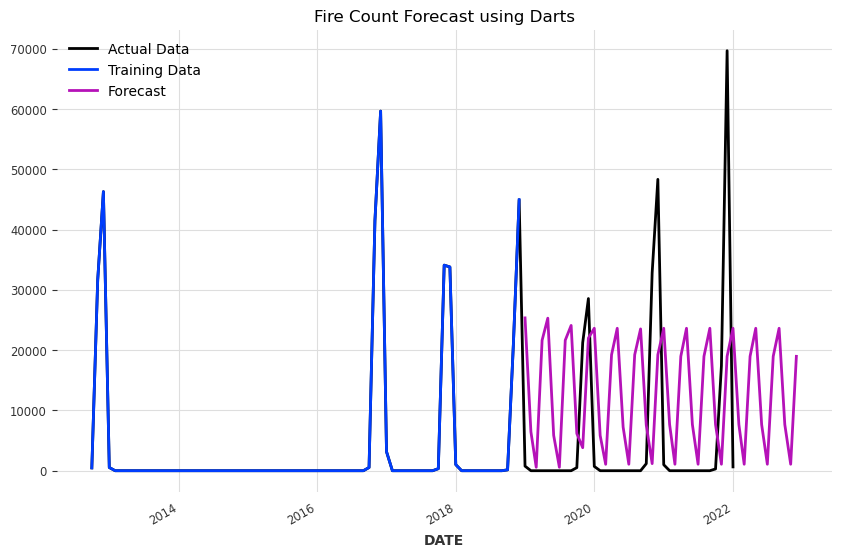

Mean Absolute Error: 15511.41933933934
The predicted value for 2022 is [163466.77555556]
The predicted value for 2023 is [152427.47]
The predicted value for 2024 is [154007.16]
The predicted value for 2025 is [154007.16]


In [31]:
#!pip install darts pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import RandomForest
from darts.metrics import mae

# Load the STN1 dataset
data = pd.read_csv("STN1.csv")

# Convert the 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')

# Set 'DATE' as the index
data.set_index('DATE', inplace=True)

# Resample the data to monthly frequency by summing the values
monthly_data = data.resample('M').sum()

# Create a TimeSeries object for the 'FIRECOUNT' column
series = TimeSeries.from_series(monthly_data['FIRECOUNT'])

# Split the data into training and testing sets (70% train, 30% test)
train, test = series.split_after(pd.Timestamp('2018-12-01'))  # Adjust split date if necessary

# Initialize the model with lags
lags = 12  # Number of past months to use for forecasting
model = RandomForest(lags=lags)  # You can also use other models like NBEATSModel or RNNModel

# Fit the model on the training data
model.fit(train)

# Make predictions for the next 4 years (48 months)
forecast_period = 48  # 4 years (2022 to 2025)
prediction = model.predict(forecast_period)

# Plot the actual data, training data, and forecasted data
plt.figure(figsize=(10, 6))
series.plot(label="Actual Data")
train.plot(label="Training Data")
prediction.plot(label="Forecast")
plt.title("Fire Count Forecast using Darts")
plt.legend()
plt.show()

# Calculate Mean Absolute Error on the test set
error = mae(test, prediction)
print(f"Mean Absolute Error: {error}")

# Extract predictions for each year
predictions_by_year = {}
start_year = 2022
predicted_values = prediction.values()  # Get the predicted values

# Loop through the predicted values and sum them by year
for i in range(forecast_period):
    year = start_year + (i // 12)  # Determine the year based on the month index
    if year not in predictions_by_year:
        predictions_by_year[year] = []
    predictions_by_year[year].append(predicted_values[i])

# Display predicted values for each year
for year, values in predictions_by_year.items():
    annual_prediction = sum(values)  # Sum values for the year
    print(f"The predicted value for {year} is {annual_prediction}")


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

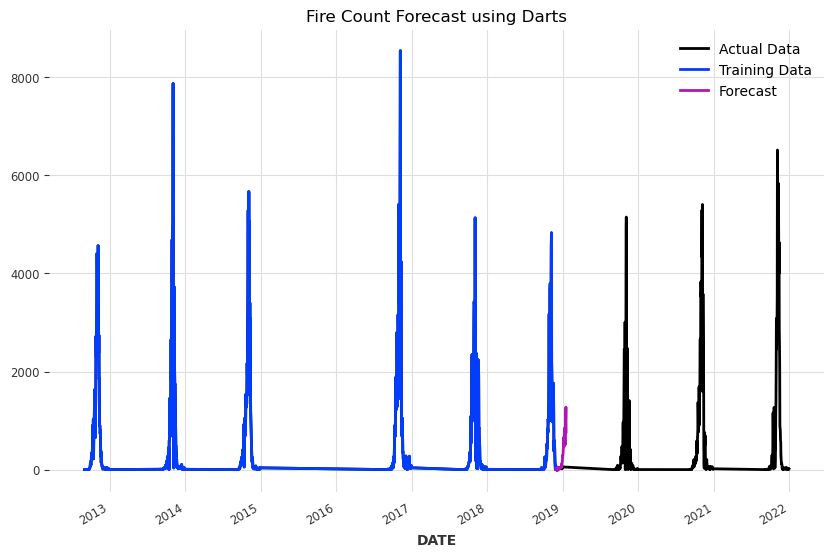

Mean Absolute Error: 241.12797341446722
Root Mean Squared Error: 400.1073661589236
The predicted value for 2022 is 150.86
The predicted value for 2023 is 424.97
The predicted value for 2024 is 3135.08
The predicted value for 2025 is 9228.02


In [2]:
import pandas as pd
import plotly.express as px
from darts import TimeSeries
from darts.models import RandomForest, RNNModel, NBEATSModel
from darts.metrics import mae
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Set Pandas options to display all rows and columns in DataFrame outputs
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width

# Load and preprocess your dataset as before
data = pd.read_csv('STN3.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
full_date_range = pd.date_range(start=data['DATE'].min(), end=data['DATE'].max(), freq='D')
data_full = data.set_index('DATE').reindex(full_date_range).rename_axis('DATE').reset_index()
data_full['FIRECOUNT'] = data_full['FIRECOUNT'].interpolate(method='linear')

# Prepare data for Darts models
# Set the 'DATE' as the index of the dataframe before creating the TimeSeries object
data_full.set_index('DATE', inplace=True)
series = TimeSeries.from_dataframe(data_full, value_cols='FIRECOUNT')

# Split the data into training and testing sets (70% train, 30% test)
train, test = series.split_after(pd.Timestamp('2018-12-01'))  # Adjust split date if necessary

# Initialize the model (RandomForest, RNNModel, NBEATSModel)
# model = RandomForest(lags=12)  # You can use RandomForest, RNNModel, or NBEATSModel
# model = RNNModel(input_chunk_length=24, output_chunk_length=12)
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50)

# Fit the model on the training data
model.fit(train)

# Make predictions for the next 4 years (48 months)
forecast_period = 48  # 4 years (2022 to 2025)
prediction = model.predict(forecast_period)

# Plot the actual data, training data, and forecasted data
plt.figure(figsize=(10, 6))
series.plot(label="Actual Data")
train.plot(label="Training Data")
prediction.plot(label="Forecast")
plt.title("Fire Count Forecast using Darts")
plt.legend()
plt.show()

# Calculate Mean Absolute Error on the forecasted period (test period)
error = mae(test[:forecast_period], prediction)  # Only use the forecasted period for MAE calculation
print(f"Mean Absolute Error: {error}")

# Calculate Root Mean Squared Error (RMSE) on the forecasted period
mse = mean_squared_error(test[:forecast_period].values(), prediction.values())  # Compare actual and predicted values for forecast period
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Extract predictions for each year
predictions_by_year = {}
predicted_values = prediction.values()  # Get the predicted values

# Loop through the predicted values and sum them by year
for i in range(forecast_period):
    year = 2022 + (i // 12)  # Determine the year based on the month index
    if year not in predictions_by_year:
        predictions_by_year[year] = []
    predictions_by_year[year].append(predicted_values[i])

# Display predicted values for each year
for year, values in predictions_by_year.items():
    annual_prediction = sum(values)  # Sum values for the year
    # Extract the scalar value from the numpy array and format it
    print(f"The predicted value for {year} is {annual_prediction.item():.2f}")



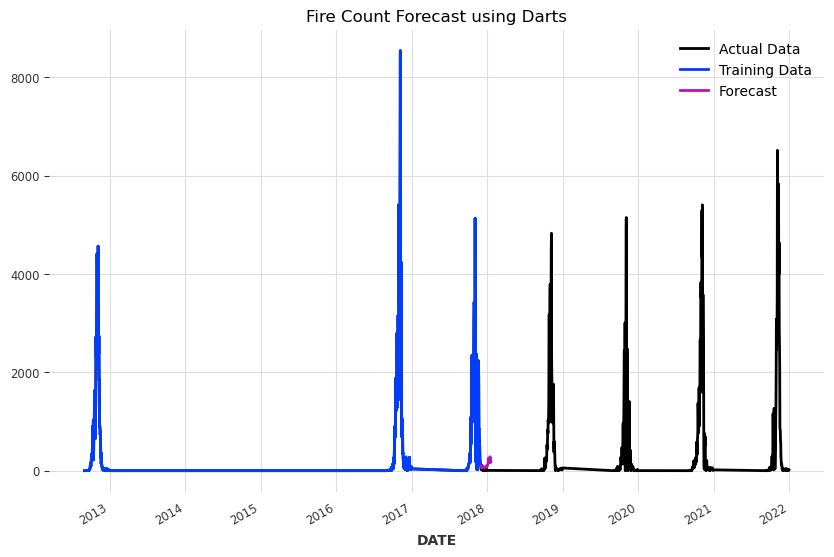

Mean Absolute Error: 99.62384904371584
Root Mean Squared Error: 126.67779583572127
The predicted value for 2022 is 865.28
The predicted value for 2023 is 860.21
The predicted value for 2024 is 1248.43
The predicted value for 2025 is 2695.07


In [1]:
import pandas as pd
import plotly.express as px
from darts import TimeSeries
from darts.models import RandomForest, RNNModel, NBEATSModel
from darts.metrics import mae
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Set Pandas options to display all rows and columns in DataFrame outputs
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width

# Load and preprocess your dataset
data = pd.read_csv('STN1.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
full_date_range = pd.date_range(start=data['DATE'].min(), end=data['DATE'].max(), freq='D')
data_full = data.set_index('DATE').reindex(full_date_range).rename_axis('DATE').reset_index()
data_full['FIRECOUNT'] = data_full['FIRECOUNT'].interpolate(method='linear')

# Prepare data for Darts models
data_full.set_index('DATE', inplace=True)
series = TimeSeries.from_dataframe(data_full, value_cols='FIRECOUNT')

# Adjust the split date to ensure proper train-test split for the forecast period (48 months)
train, test = series.split_after(pd.Timestamp('2017-12-01'))  # Train data up to 2017, forecast for 2018-2025

# Initialize the model (RandomForest, RNNModel, NBEATSModel)
model = RandomForest(lags=12)  # You can use RandomForest, RNNModel, or NBEATSModel
# model = RNNModel(input_chunk_length=24, output_chunk_length=12)
# model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100)

# Fit the model on the training data
model.fit(train)

# Make predictions for the next 4 years (48 months)
forecast_period = 48  # 4 years (2022 to 2025)
prediction = model.predict(forecast_period)

# Plot the actual data, training data, and forecasted data
plt.figure(figsize=(10, 6))
series.plot(label="Actual Data")
train.plot(label="Training Data")
prediction.plot(label="Forecast")
plt.title("Fire Count Forecast using Darts")
plt.legend()
plt.show()

# Calculate Mean Absolute Error on the test set (adjusted to the forecast period length)
error = mae(test, prediction)
print(f"Mean Absolute Error: {error}")

# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(test[:forecast_period].values(), prediction.values())  # Compare actual and predicted values for forecast period
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Extract predictions for each year
predictions_by_year = {}
predicted_values = prediction.values()  # Get the predicted values

# Loop through the predicted values and sum them by year
for i in range(forecast_period):
    year = 2022 + (i // 12)  # Determine the year based on the month index
    if year not in predictions_by_year:
        predictions_by_year[year] = []
    predictions_by_year[year].append(predicted_values[i])

# Display predicted values for each year
for year, values in predictions_by_year.items():
    annual_prediction = sum(values)  # Sum values for the year
    # Extract the scalar value from the numpy array and format it
    print(f"The predicted value for {year} is {annual_prediction.item():.2f}")

# Reset options after use if needed
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_colwidth')


In [46]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import ARIMA
from darts.metrics import mae
from sklearn.metrics import mean_squared_error
import plotly.express as px

# Assuming 'df' is your dataframe

# Convert the 'DATE' column to datetime format if it's not already
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')

# Set the 'DATE' column as the index
df.set_index('DATE', inplace=True)

# Resample the data to monthly frequency by summing the values
df_monthly = df.resample('M').sum()

# Convert the 'FIRECOUNT' column to a Darts TimeSeries
series = TimeSeries.from_dataframe(df_monthly, value_cols='FIRECOUNT')

# Split the data into training and test sets (70:30 ratio)
train = series[:int(0.7 * len(series))]
test = series[int(0.7 * len(series)):]

# Ensure test set length is 48 (for 2022-2025 forecast)
test = series[-48:]

# Fit ARIMA model
model = ARIMA()
model.fit(train)

# Make a forecast for the next 48 months (2022-2025)
forecast = model.predict(n=48)

# Evaluate the model using MAE and MSE
mae_value = mae(forecast, test)
mse_value = mean_squared_error(test.values(), forecast.values())  # Compare for the same length

# Print MAE and MSE values
print(f"Mean Absolute Error (MAE): {mae_value}")
print(f"Mean Squared Error (MSE): {mse_value}")

# Create a forecast date range (2022-2025, 48 months)
forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')

# Ensure forecast_values has the correct length
forecast_values = forecast.values()  # This should already be the correct length (48 values)

# Create a DataFrame for visualization
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Predicted FIRECOUNT': forecast_values.flatten()  # Flatten if needed
})

# Visualize the forecast using Plotly
fig = px.line(forecast_df, x='Date', y='Predicted FIRECOUNT', title='Forecasted FIRECOUNT (2022-2025)', labels={'Predicted FIRECOUNT': 'FIRECOUNT'})
fig.show()


KeyError: 'DATE'